<a href="https://colab.research.google.com/github/solomontessema/Data-Analytics-and-AI-with-Python/blob/main/notebooks/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

table>
  <tr>
    <td><img src="https://ionnova.com/img/ionnova_logo_name_2.png" width="120px"></td>
    <td><h1>Day 10: Introduction to Machine Learning</h1></td>
  </tr>
</table>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('house_prices.csv')
print(df[['sqft_living', 'price']])


       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21608         1530  360000.0
21609         2310  400000.0
21610         1020  402101.0
21611         1600  400000.0
21612         1020  325000.0

[21613 rows x 2 columns]


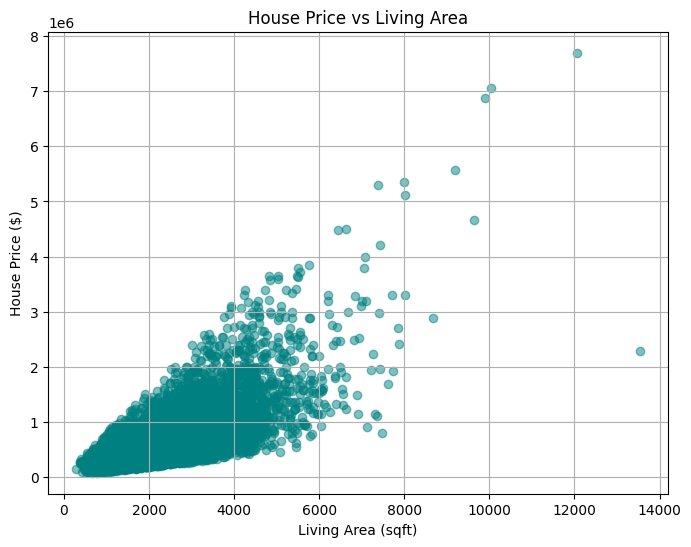

In [7]:
# Scatter plot: sqft_living vs price
plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, color='teal')
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Price ($)')
plt.title('House Price vs Living Area')
plt.grid(True)
plt.show()


In [12]:
# Use only one feature: sqft_living
X = df[['sqft_living']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test).round(0)
# Combine into a single DataFrame
results_df = pd.DataFrame({
    'sqft_living': X_test['sqft_living'].values,
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Display the first few rows
print(results_df.head())

print("MRSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

   sqft_living  Actual Price  Predicted Price
0         2070      365000.0         536679.0
1         2900      865000.0         768710.0
2         3770     1038000.0        1011922.0
3         4560     1490000.0        1232771.0
4         2550      711000.0         670866.0
MRSE: 76484975032.0805
R² Score: 0.49406906731687084


In [13]:

sqft = float(input("Enter square footage of living space: "))
user_df = pd.DataFrame([[sqft]], columns=['sqft_living'])
predicted_price = model.predict(user_df)[0]
print(f"\nPredicted House Price: ${predicted_price:,.2f}")


Enter square footage of living space: 2000

Predicted House Price: $517,110.37


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('house_prices.csv')

# Select top 3 features
X = df[['sqft_living', 'grade', 'bathrooms']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 69230884766.18736
R² Score: 0.5420532452871396


In [17]:
# Ask user for all three inputs
sqft = float(input("Enter square footage of living space: "))
grade = float(input("Enter grade (1–13): "))
bath = float(input("Enter number of bathrooms: "))

# Create a DataFrame with the inputs
user_df = pd.DataFrame([[sqft, grade, bath]], columns=['sqft_living', 'grade', 'bathrooms'])

# Predict using the trained model
predicted_price = model.predict(user_df)[0]

# Show result
print(f"\nPredicted House Price: ${predicted_price:,.2f}")



Enter square footage of living space: 2000
Enter grade (1–13): 8
Enter number of bathrooms: 3

Predicted House Price: $527,324.72


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

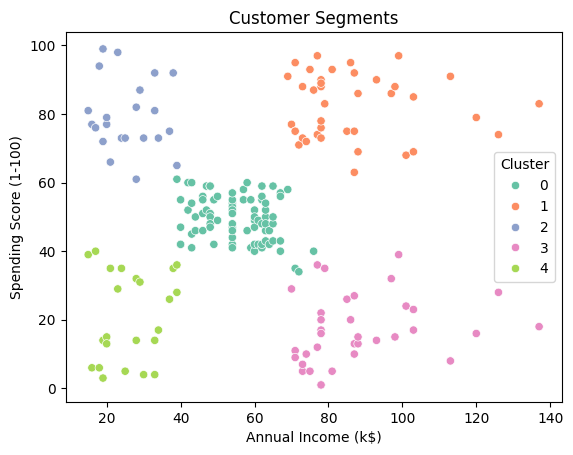

In [20]:
# Load dataset
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Preprocess
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segments")
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alyelbadry/house-pricing-dataset")

print("Path to dataset files:", path)